<a href="https://colab.research.google.com/github/shireesha27/demo/blob/master/ICP11_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pwd

/content/ICP11


In [72]:
!mkdir ICP11

In [73]:
cd ICP11

/content/ICP11/ICP11


In [75]:
# Simple CNN model for CIFAR-10
# Import the necessary libraries
# Python program using numpy for arranging a given set of data into a table
import numpy 
# Import dataset
from keras.datasets import cifar10
# Import the model
from keras.models import Sequential
from keras.models import Model
# Dense layer for the fully connected layers
# Creates activation with the same distribution
from keras.layers import Dense, Activation
# Dropout is used to prevent overfitting
from keras.layers import Dropout
# Flatten is used to convert the multidimensional to one dimension 
from keras.layers import Flatten
# Importing the maxnormalization 
from keras.constraints import maxnorm
# SGD is a type of optimizer
from keras.optimizers import SGD
# Convolution layer will take the inputs and run convolution filters on them
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.layers import Input, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import os
import seaborn as sns
import itertools
# Python program using Matplotib for forming a linear plot
import matplotlib.pyplot as plt
from keras import backend as K
K.set_image_data_format('channels_first')

In [76]:
# Set random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [77]:
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape[1:])
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (3, 32, 32)
y_train shape: (50000, 1)
X_test shape: (10000, 3, 32, 32)
y_test shape: (10000, 1)
50000 train samples
10000 test samples


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


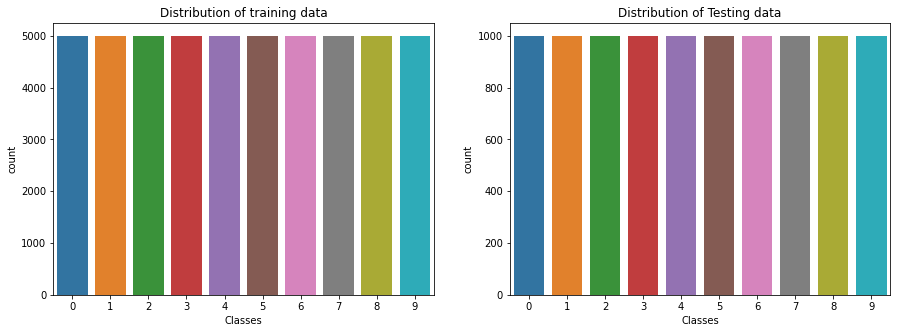

In [78]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
#Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
#Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [79]:
# Normalize the data. Before we need to connvert data type to float for computation
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train / 255.0
X_test = X_test / 255.0
yp=y_test


In [80]:
# one hot encode outputs 
# utils.to_categorical is used to convert array of labeled data to one-hot vector
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [81]:
# Create the model
model = Sequential()
# Convolution layer will take the inputs and run convolution filters on them
# relu is a common activation function
# padding= same means we aren't changing the size of the image
model.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
# Dropout layer is used to prevent overfitting the data
model.add(Dropout(0.2))
# Adding another convolution layer with 32 features with size (3,3)
# relu is a common activation function
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
# Pooling layer helps to make the image classifier more robust
# Max pool layer with size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the layern
model.add(Flatten())
# Fully connected layer with 512 eurons and a relu activation function
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
# Adding a dropout layer at 50%
model.add(Dropout(0.5))
# Fully connected layer with 10 neurons and softmax activation function
model.add(Dense(num_classes, activation='softmax'))

In [82]:
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
# The optimizer wil tune the weights in network to approach the point of lowest loss
# SGD is a type of optimizer
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# Compile the model with choosen parameters
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Print out the model summary
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)              

In [83]:
# Fit the model
histoty= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: ", scores[1])
print("Test Loss: ",  scores[0])

Epoch 1/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7201 - accuracy: 0.3757 - val_loss: 1.4522 - val_accuracy: 0.4717
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4289 - accuracy: 0.4846 - val_loss: 1.3336 - val_accuracy: 0.5210
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3329 - accuracy: 0.5250 - val_loss: 1.2731 - val_accuracy: 0.5469
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2728 - accuracy: 0.5454 - val_loss: 1.2358 - val_accuracy: 0.5589
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.1967 - accuracy: 0.5761
Test Accuracy:  0.5760999917984009
Test Loss:  1.1966501474380493


In [84]:
print(histoty.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


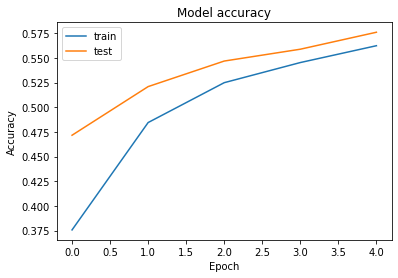

In [86]:
# Visualize Loss and Accuracy using the history object
# summarize history for accuracy
plt.plot(histoty.history['accuracy'])
plt.plot(histoty.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
    

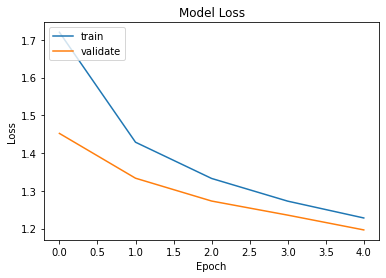

In [87]:
# summarize history for loss
plt.plot(histoty.history['loss']) 
plt.plot(histoty.history['val_loss']) 
plt.title('Model Loss')
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

*Question1*:

In [21]:
# Create the model
m1 = Sequential()
# Convolution layer will take the inputs and run convolution filters on them
# relu is a common activation function
# padding= same means we aren't changing the size of the image
m1.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
# Dropout layer is used to prevent overfitting the data
# Dropout layer at 20%
m1.add(Dropout(0.2))
# Adding another convolution layer with 32 features with size(3,3)
m1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Pooling layer helps to make the image classifier more robust
# Max pool layer with size (2,2)
m1.add(MaxPooling2D(pool_size=(2, 2)))
# Adding another convolution layer with 64 features with size(3,3)
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Dropout layer at 20%
m1.add(Dropout(0.2))
# Adding another convolution layer with 64 features with size(3,3)
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Max pool layer with size (2,2)
m1.add(MaxPooling2D(pool_size=(2, 2)))
# Adding another convolution layer with 128 features with size(3,3)
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# Dropout layer at 20%
m1.add(Dropout(0.2))
# Adding another convolution layer with 128 features with size(3,3)
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# Max pool layer with size (2,2)
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Flatten())
# Dropout layer at 20%
m1.add(Dropout(0.2))
# Fully connected layer with 1024 eurons and a relu activation function
m1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
# Dropout layer at 20%
m1.add(Dropout(0.2))
# Fully connected layer with 512 eurons and a relu activation function
m1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
# Dropout layer at 20%
m1.add(Dropout(0.2))
# Fully connected layer with 10 neurons and softmax activation function
m1.add(Dense(num_classes, activation='softmax'))

In [88]:
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
# The optimizer wil tune the weights in network to approach the point of lowest loss
# SGD is a type of optimizer
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# Compile the model with choosen parameters
m1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Print out the model summary
print(m1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 16, 16)       

In [89]:
# Fit the model
history_new = m1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = m1.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: %.2f%%" % scores[1])
print("Test Loss: ", scores[0])

Epoch 1/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9604 - accuracy: 0.6600 - val_loss: 0.8259 - val_accuracy: 0.7107
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7568 - accuracy: 0.7367 - val_loss: 0.7574 - val_accuracy: 0.7344
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6908 - accuracy: 0.7558 - val_loss: 0.7055 - val_accuracy: 0.7519
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6435 - accuracy: 0.7728 - val_loss: 0.6850 - val_accuracy: 0.7619
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6707 - accuracy: 0.7633
Test Accuracy: 0.76%
Test Loss:  0.6707321405410767


In [90]:
# Predict the value
y=m1.predict_classes(X_train[[1],:])
print(y[0])

9


In [99]:
##Question 2: 
# predict the first 4 image of the test data
import matplotlib.pyplot as plt
for i in range(0,4):
  predicted_value = model.predict(X_test[[i],:]) 
  predict_classes = model.predict_classes(X_test[[i],:]) 
  actual_value = y_test[[i],:]
  print("Actual Value for :" + str(i+1) + ' Image ' + str(numpy.argmax(actual_value)))
  print("Predicted Value for :" + str(i+1) + ' Image ' + str(predict_classes[0])+'\n')

Actual Value for :1 Image 3
Predicted Value for :1 Image 3

Actual Value for :2 Image 8
Predicted Value for :2 Image 1

Actual Value for :3 Image 8
Predicted Value for :3 Image 8

Actual Value for :4 Image 0
Predicted Value for :4 Image 0



In [100]:
# Printing the keys 
print(history_new.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


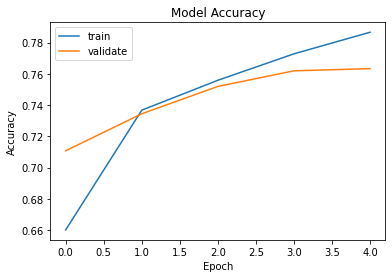

In [101]:
## Question 3: Visualize Loss and Accuracy using the history object
# Summarize history for accuracy
plt.plot(history_new.history['accuracy']) 
plt.plot(history_new.history['val_accuracy']) 
plt.title('Model Accuracy')
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.legend(['train', 'validate'], loc='upper left')

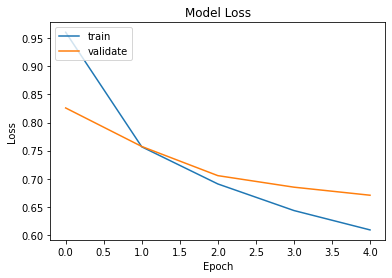

In [102]:
# Summarize history for loss
plt.plot(history_new.history['loss']) 
plt.plot(history_new.history['val_loss']) 
plt.title('Model Loss')
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [103]:
# Saving the model in the format of .h5
model.save("cifar10.h5")

In [104]:
# Reading the saved format data
import tensorflow as tf
from tensorflow import keras
new_model = tf.keras.models.load_model('cifar10.h5')

In [105]:
# Bonus question
# New model has the model data saved in h5 format
# predict the first 4 image of the test data using saved model (.h5 model)
import matplotlib.pyplot as plt
for i in range(0,4):
  predicted_value = new_model.predict(X_test[[i],:]) 
  predict_classes = new_model.predict_classes(X_test[[i],:]) 
  actual_value = y_test[[i],:]
  print("Actual Value for :" + str(i+1) + ' Image ' + str(numpy.argmax(actual_value)))
  print("Predicted Value for :" + str(i+1) + ' Image ' + str(predict_classes[0])+'\n')

Actual Value for :1 Image 3
Predicted Value for :1 Image 3

Actual Value for :2 Image 8
Predicted Value for :2 Image 1

Actual Value for :3 Image 8
Predicted Value for :3 Image 8

Actual Value for :4 Image 0
Predicted Value for :4 Image 0



In [106]:
from google.colab import files
upload = files.upload()